In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
import random

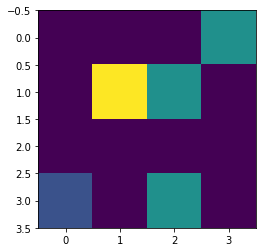

In [6]:
grid= np.zeros((4,4))
start_position=tuple([3,0])
pit1=tuple([0,3])
pit2= tuple([1,2])
pit3=tuple([3,2])
gold= tuple([1,1])
grid[start_position]=0.25
grid[gold]=1
grid[pit1]=0.5
grid[pit2]=0.5
grid[pit3]=0.5

plt.imshow(grid)

In [7]:
class Environment(gym.Env):
  metadata = {'render.modes': []}
  def __init__(self): 
    self.observation_space = spaces.Discrete(16) # 4 by 4 grid # spaces is imported from gym
    self.action_space= spaces.Discrete(4) # right, left, top, bottom movement
    self.max_timesteps=10
  def reset(self):
    self.timesteps=0
    self.state= np.zeros((4,4))
    self.agent_pos= [3,0]
    self.goal_pos = tuple([1,1])
    self.state[tuple(self.agent_pos)]= 0.25 # agent start position
    self.state[tuple(self.goal_pos)]= 1 # agent goal position
    self.state[tuple([0,3])] = 0.5 # pits
    self.state[tuple([1,2])] = 0.5 # pits
    self.state[tuple([3,2])] = 0.5 #pits
    self.state[tuple([1,0])] = 0.80 # Wampus
    self.observation = self.agent_pos
    self.reward = 0
    return self.observation


  def step(self, action):
    # take the appropriate action(move right, left, down, up)
    current_agent_pos= self.agent_pos
    self.state[tuple(current_agent_pos)] = 0 # get rid of old pose
    if action ==0:
      self.agent_pos[0] +=1
    if action==1:
      self.agent_pos[0] -=1
    if action ==2:
      self.agent_pos[1] +=1
    if action==3:
      self.agent_pos[1] -=1
    if action==4:
      self.agent_pos = current_agent_pos 
    self.agent_pos = np.clip(self.agent_pos, 0, 3) # clip values
    #self.state = np.zeros((4,4))
    # add original map here again
    self.state[tuple([0,3])] = 0.5 # pits
    self.state[tuple([1,2])] = 0.5 # pits
    self.state[tuple([3,2])] = 0.5 #pits
    self.state[tuple([1,0])] = 0.80 # Wampus
    self.state[tuple(self.agent_pos)]= 0.25 # add updated pose to the grid
    # do need to clear last known location of agent and add new one
    observation = self.agent_pos 
    reward = 0
    if (self.agent_pos ==self.goal_pos).all(): 
      self.reward +=1000 
      print("reached goal, I win")
    if (self.agent_pos == [0,3]).all() or (self.agent_pos == [1,2]).all() or (self.agent_pos == [3,2]).all():
      print("Ohhh no I have fallen into a pit :(")
      self.reward -= 100
    if (self.agent_pos == [1,0]).all():
      self.reward -= 500 
    self.timesteps += 1
    done = True if (self.timesteps>= self.max_timesteps) or (self.agent_pos == self.goal_pos).all() else False
    info = {}
    return observation, reward, done, info
  def render(self):
    plt.imshow(self.state)





""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

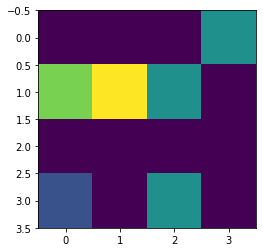

<IPython.core.display.Javascript object>

moving left


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

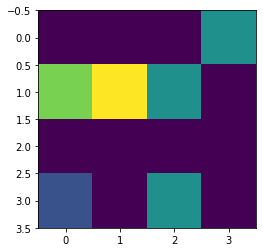

<IPython.core.display.Javascript object>

moving left


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

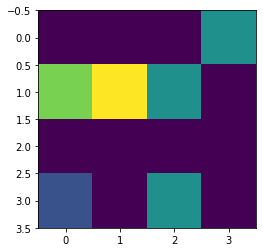

<IPython.core.display.Javascript object>

moving down


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

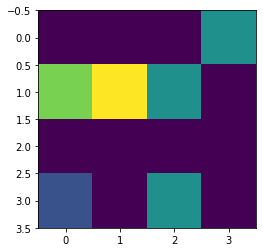

<IPython.core.display.Javascript object>

moving down


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

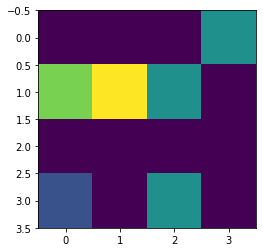

<IPython.core.display.Javascript object>

moving down


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

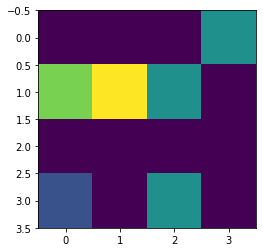

<IPython.core.display.Javascript object>

moving up


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

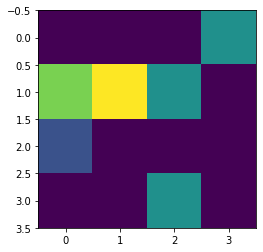

<IPython.core.display.Javascript object>

not moving, staying put


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

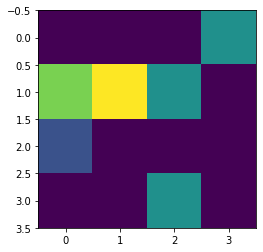

<IPython.core.display.Javascript object>

not moving, staying put


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

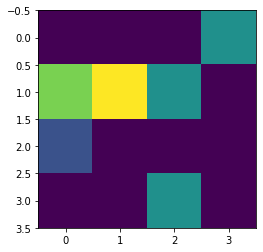

<IPython.core.display.Javascript object>

moving right


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

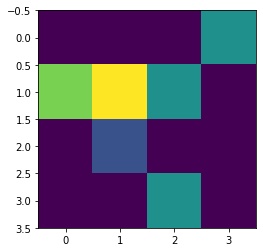

<IPython.core.display.Javascript object>

not moving, staying put


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

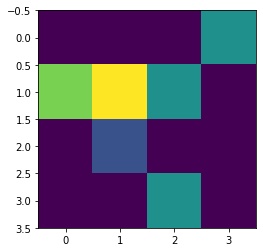

<IPython.core.display.Javascript object>

In [8]:
def print_actions(final_action):
  if final_action==0:
    print('moving down')
  elif final_action==1:
    print('moving up')
  elif final_action==2:
    print('moving right')
  elif final_action==3:
    print('moving left')
  else:
    print('not moving, staying put')


# stochastic random agent
class Stochastic_RandomAgent:
  def __init__(self, env):
    self.env= env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
  def step(self, observation):
    return np.random.choice(self.action_space.n)

environment = Environment() # instantiate environment
agent=Stochastic_RandomAgent(env=environment)
observation = environment.reset() # good practice to reset envioernment when instantiating it
done=False

output_grid= widgets.Grid(1,1)
with output_grid.output_to(0,0):
  environment.render()

while not done:
  action = agent.step(observation) # decide on an action given current observation
  rand_num= random.randint(1,10)
  # This is what makes the environment stochastic.... p(s'|s,a) != 1
  #Here there is an 20% chance that the agent does not take the intended action and stays at the same spot
    
  if rand_num <=8:
    final_action = action
  else:
    final_action = 4
  print_actions(final_action)
  observation, reward, done, info = environment.step(final_action) # take that action
  with output_grid.output_to(0,0): 
    #output_grid.clear_cell()
    environment.render()
    time.sleep(2)
